# Kuramoto-Sivashinsky Equation

$$
u_t = -u u_x - u_{xx} - \nu u_{xxxx}  \qquad (0 < x < L)
$$

$$
u_t = -\lambda u u_x - \lambda^2 u_{xx} - \nu \lambda^4 u_{xxxx}, \qquad (0 < x < 1)
$$

## Importing modules 

In [1]:
%matplotlib nbagg

In [2]:
import time

import numpy as np
import equations as eq
from scipy.fftpack import rfft, irfft

import h5py

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.gridspec import GridSpec

## Setting Parameters 

In [3]:
NW = 48
ks01 = eq.KS(NW)
args = ks01.getParamDefault()

N2 = ks01.N2
J = ks01.J
x = ks01.get_x()

## Setting initial data 

In [4]:
u0 = np.zeros(N2)
u0[1] = 0.5*J

## Computation 

In [5]:
trange0 = np.arange(0., 50.0, 2.0)
trange1 = np.arange(0., 450.0, 2.0)

max_step = 1.0e-1

In [6]:
fname = 'ks.hdf5'

### Comparison of Several Solvers

See [the official document](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html "scipy doc")
for the information of available solvers.

In [7]:
stime = time.time()
with h5py.File(fname, 'w') as fh:
    ks01.mkInitDataSet(u0, fh)
    ks01.evolve(fh, trange0, tuple(args), 
                max_step=max_step, method='RK23')
etime = time.time()
print(int(etime - stime))

279


In [8]:
stime = time.time()
with h5py.File(fname, 'w') as fh:
    ks01.mkInitDataSet(u0, fh)
    ks01.evolve(fh, trange0, tuple(args), 
                max_step=max_step, method='Radau')
etime = time.time()
print(int(etime - stime))

1


In [9]:
stime = time.time()
with h5py.File(fname, 'w') as fh:
    ks01.mkInitDataSet(u0, fh)
    ks01.evolve(fh, trange0, tuple(args), 
                max_step=max_step, method='BDF')
etime = time.time()
print(int(etime - stime))

0


### Continuation of the Computation

In [10]:
stime = time.time()
with h5py.File(fname, 'r+') as fh:
    ks01.evolve(fh, trange1, tuple(args), 
                max_step=max_step, method='BDF')
etime = time.time()
print(int(etime - stime))

2


## Visualization

In [11]:
with h5py.File(fname, 'r') as fh:
    data = fh['u'][()]
    time = fh['trange'][()]

up = ks01.mkPhysData(data)

<IPython.core.display.Javascript object>


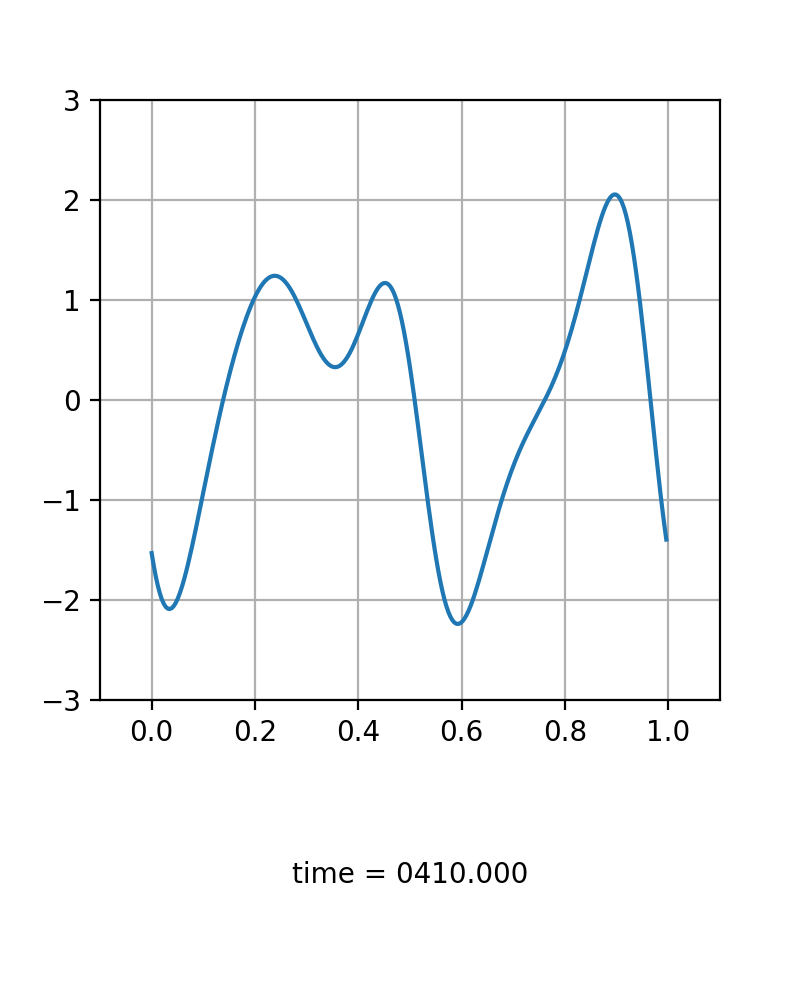

In [15]:
gsP = GridSpec(1,1)
gsT = GridSpec(1,1)
gsP.update(bottom=0.3, top=0.9)
gsT.update(bottom=0.05, top=0.2)
fig = plt.figure(figsize=(4,5))

ax = fig.add_subplot(gsP[0])
ax.set_ylim((-3.0, 3.0))
ax.set_xlim((-0.1, 1.1))
ax.grid(True)
lines = plt.plot(x, [np.nan]*len(x))

timeframe = fig.add_subplot(gsT[0])
timeframe.set_axis_off()
timer = timeframe.text(0.5,0.5,
                       '', 
                       va='center', ha="center"
                      )
timeformat = "time = {0:08.3f}"

def init():
    for l in lines:
        l.set_ydata([np.nan] * len(x))
    timer.set_text(timeformat.format(time[0]))
    return lines + [timer]

def animate(i):
    for l in lines:
        l.set_ydata(up[i,:])
    timer.set_text(timeformat.format(time[i]))
    return lines + [timer]

ani = animation.FuncAnimation(
    fig, animate, frames=up.shape[0],
    init_func=init, interval=100, blit=True,
    repeat=True)

plt.show()